# Draw figures and do analysis for dynamics explored in detail

Packages

In [289]:
import torch
import mat73
import matplotlib.pyplot as plt
from pathlib import Path

Import data

In [290]:
loadEGC = mat73.loadmat("./data/EGCresultv1.mat")
egc = torch.tensor(loadEGC["egc"]).type('torch.FloatTensor')

num_rho, num_samp = egc.size()
Ns = 32
Nr = 32
num_init = 10 # different initial consitions for simulation

# for different supply
Fractions = torch.zeros(3,num_rho,num_samp,num_init,5)
## first dim: const, linear, and logistic
## last dim
# 0: fraction of survival
# 1: chaos
# 2: limit cyc
# 3: alt s s
# 4: steady unstable
datapath = "./data/Jul3/"
datapathnew = "./data/Jul8/"

num_task = 48
for task_id in range(num_task):
    loadF = mat73.loadmat(datapathnew+"DiveDyn"+str(task_id)+".mat")
    loadFLin = mat73.loadmat(datapath+"DiveDynLin"+str(task_id)+".mat")
    loadFLog = mat73.loadmat(datapath+"DiveDynLog"+str(task_id)+".mat") # Jun 26 and 27 with the new classifier
    Fractions[0][[task_id,task_id+48,task_id+96]] = torch.tensor(loadF["Fractions"]).type('torch.FloatTensor')
    Fractions[1][[task_id,task_id+48,task_id+96]] = torch.tensor(loadFLin["Fractions"]).type('torch.FloatTensor')
    Fractions[2][[task_id,task_id+48,task_id+96]] = torch.tensor(loadFLog["Fractions"]).type('torch.FloatTensor')

## Fraction of chaos

const supply

Text(0, 0.5, 'Chaos or not')

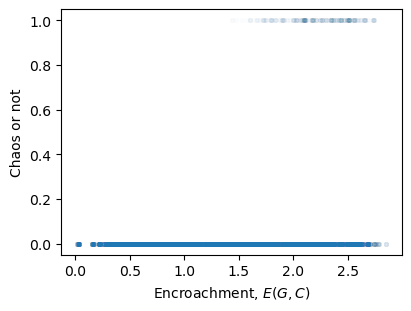

In [291]:
EGC = egc.unsqueeze(-1).repeat(1,1,num_init)
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.scatter(EGC,Fractions[0,:,:,:,1], s=8, alpha=0.01) # x: E; y: chaos

plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Chaos or not')

In [292]:
import math

In [293]:
x_mean = []
ch_mean = []
x_std = []
ch_std = []

for i in range(30):
    indeces = ((i*0.1<=EGC) & (EGC<(i+1)*0.1)).nonzero(as_tuple=True)
    x_group = EGC[indeces]
    y_group = Fractions[0,:,:,:,1][indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        ch_mean.append(torch.mean(y_group))
        ch_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

Text(0, 0.5, 'Mean fraction of chaos')

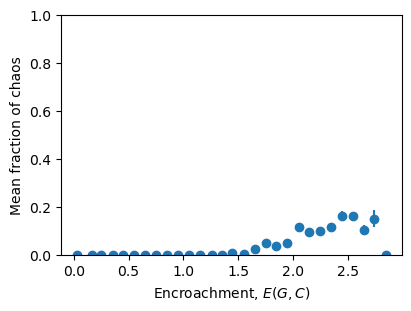

In [294]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(x_mean,ch_mean, xerr=x_std, yerr= ch_std, marker = 'o', ls='none')

#plt.xlim(.0,1.4)
plt.ylim(.0,1.0)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Mean fraction of chaos')

linear supply

In [295]:
x_mean = []
chLi_mean = []
x_std = []
chLi_std = []

for i in range(30):
    indeces = ((i*0.1<=EGC) & (EGC<(i+1)*0.1)).nonzero(as_tuple=True)
    x_group = EGC[indeces]
    y_group = Fractions[1,:,:,:,1][indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        chLi_mean.append(torch.mean(y_group))
        chLi_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

Text(0, 0.5, 'Mean fraction of chaos')

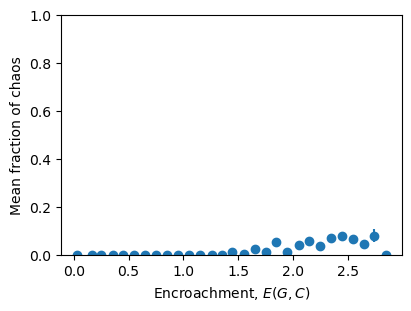

In [296]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(x_mean,chLi_mean, xerr=x_std, yerr= chLi_std, marker = 'o', ls='none')

#plt.xlim(.0,1.4)
plt.ylim(.0,1.0)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Mean fraction of chaos')

logistic supply

In [297]:
x_mean = []
chLo_mean = []
x_std = []
chLo_std = []

for i in range(30):
    indeces = ((i*0.1<=EGC) & (EGC<(i+1)*0.1)).nonzero(as_tuple=True)
    x_group = EGC[indeces]
    y_group = Fractions[2,:,:,:,1][indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        chLo_mean.append(torch.mean(y_group))
        chLo_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

Text(0, 0.5, 'Mean fraction of chaos')

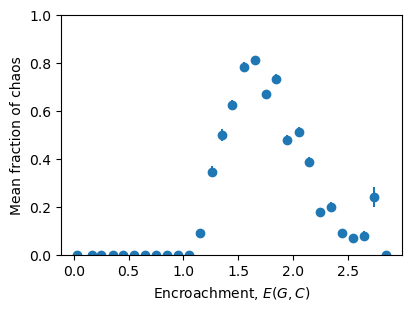

In [298]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(x_mean,chLo_mean, xerr=x_std, yerr= chLo_std, marker = 'o', ls='none')

#plt.xlim(.0,1.4)
plt.ylim(.0,1.0)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Mean fraction of chaos')

## Fraction of limit cycles

const supply

In [299]:
x_mean = []
lc_mean = []
x_std = []
lc_std = []

for i in range(30):
    indeces = ((i*0.1<=EGC) & (EGC<(i+1)*0.1)).nonzero(as_tuple=True)
    x_group = EGC[indeces]
    y_group = Fractions[0,:,:,:,2][indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        lc_mean.append(torch.mean(y_group))
        lc_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

Text(0, 0.5, 'Mean fraction of limit cycles')

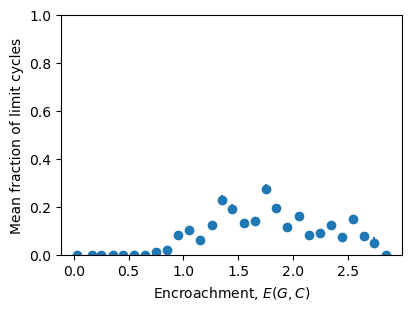

In [300]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(x_mean,lc_mean, xerr=x_std, yerr= lc_std, marker = 'o', ls='none')

#plt.xlim(.0,1.4)
plt.ylim(.0,1.0)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Mean fraction of limit cycles')

linear supply

In [301]:
x_mean = []
lcLi_mean = []
x_std = []
lcLi_std = []

for i in range(30):
    indeces = ((i*0.1<=EGC) & (EGC<(i+1)*0.1)).nonzero(as_tuple=True)
    x_group = EGC[indeces]
    y_group = Fractions[1,:,:,:,2][indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        lcLi_mean.append(torch.mean(y_group))
        lcLi_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

Text(0, 0.5, 'Mean fraction of limit cycles')

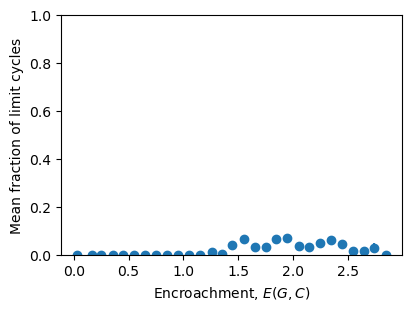

In [302]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(x_mean,lcLi_mean, xerr=x_std, yerr= lcLi_std, marker = 'o', ls='none')

#plt.xlim(.0,1.4)
plt.ylim(.0,1.0)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Mean fraction of limit cycles')

logistic supply

In [303]:
x_mean = []
lcLo_mean = []
x_std = []
lcLo_std = []

for i in range(30):
    indeces = ((i*0.1<=EGC) & (EGC<(i+1)*0.1)).nonzero(as_tuple=True)
    x_group = EGC[indeces]
    y_group = Fractions[2,:,:,:,2][indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        lcLo_mean.append(torch.mean(y_group))
        lcLo_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

Text(0, 0.5, 'Mean fraction of limit cycles')

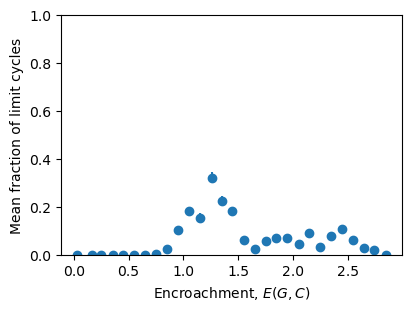

In [304]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(x_mean,lcLo_mean, xerr=x_std, yerr= lcLo_std, marker = 'o', ls='none')

#plt.xlim(.0,1.4)
plt.ylim(.0,1.0)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Mean fraction of limit cycles')

## Fractions of alt S S

const supply

In [342]:
x_mean = []
alt_mean = []
x_std = []
alt_std = []

for i in range(60):
    indeces = ((i*0.1<=EGC) & (EGC<(i+1)*0.1)).nonzero(as_tuple=True)
    x_group = EGC[indeces]
    y_group = Fractions[0,:,:,:,3][indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])/num_init))
        alt_mean.append(torch.mean(y_group))
        alt_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])/num_init))

Text(0, 0.5, 'Mean fraction of alt')

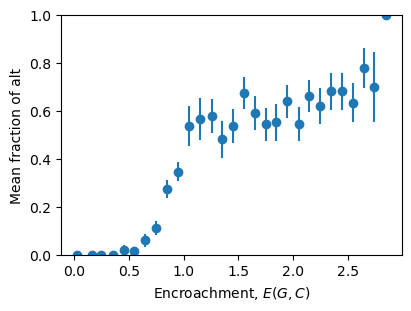

In [343]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(x_mean,alt_mean, xerr=x_std, yerr= alt_std, marker = 'o', ls='none')

#plt.xlim(.0,1.4)
plt.ylim(.0,1.0)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Mean fraction of alt')

linear supply

In [307]:
x_mean = []
altLi_mean = []
x_std = []
altLi_std = []

for i in range(28):
    indeces = ((i*0.1<=EGC) & (EGC<(i+1)*0.1)).nonzero(as_tuple=True)
    x_group = EGC[indeces]
    y_group = Fractions[1,:,:,:,3][indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        altLi_mean.append(torch.mean(y_group))
        altLi_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

Text(0, 0.5, 'Mean fraction of alt')

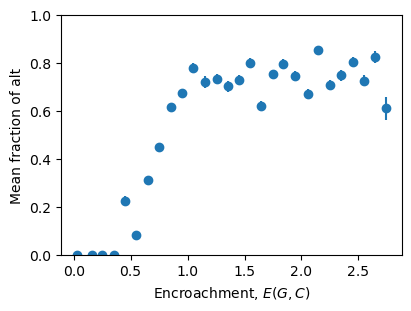

In [308]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(x_mean,altLi_mean, xerr=x_std, yerr= altLi_std, marker = 'o', ls='none')

#plt.xlim(.0,1.4)
plt.ylim(.0,1.0)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Mean fraction of alt')

logistic supply

In [309]:
x_mean = []
altLo_mean = []
x_std = []
altLo_std = []

for i in range(28):
    indeces = ((i*0.1<=EGC) & (EGC<(i+1)*0.1)).nonzero(as_tuple=True)
    x_group = EGC[indeces]
    y_group = Fractions[2,:,:,:,3][indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        altLo_mean.append(torch.mean(y_group))
        altLo_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

Text(0, 0.5, 'Mean fraction of alt')

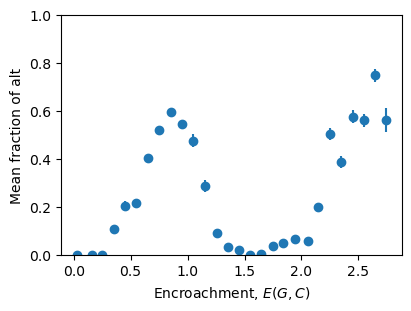

In [310]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(x_mean,altLo_mean, xerr=x_std, yerr= altLo_std, marker = 'o', ls='none')

#plt.xlim(.0,1.4)
plt.ylim(.0,1.0)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Mean fraction of alt')

## Unstable steady states

const supply

In [311]:
x_mean = []
us_mean = []
x_std = []
us_std = []

for i in range(28):
    indeces = ((i*0.1<=EGC) & (EGC<(i+1)*0.1)).nonzero(as_tuple=True)
    x_group = EGC[indeces]
    y_group = Fractions[0,:,:,:,4][indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        us_mean.append(torch.mean(y_group))
        us_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

Text(0, 0.5, 'Mean fraction of unstable steady')

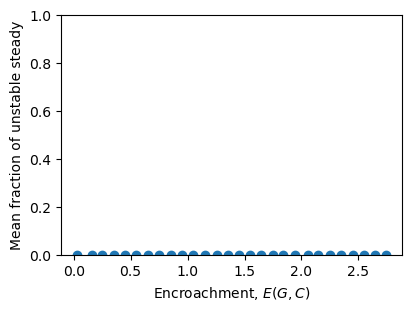

In [312]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(x_mean,us_mean, xerr=x_std, yerr= us_std, marker = 'o', ls='none')

#plt.xlim(.0,1.4)
plt.ylim(.0,1.0)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Mean fraction of unstable steady')

linear supply

In [313]:
x_mean = []
usLi_mean = []
x_std = []
usLi_std = []

for i in range(28):
    indeces = ((i*0.1<=EGC) & (EGC<(i+1)*0.1)).nonzero(as_tuple=True)
    x_group = EGC[indeces]
    y_group = Fractions[1,:,:,:,4][indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        usLi_mean.append(torch.mean(y_group))
        usLi_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

Text(0, 0.5, 'Mean fraction of unstable steady')

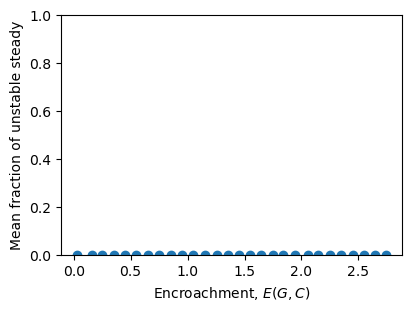

In [314]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(x_mean,usLi_mean, xerr=x_std, yerr= usLi_std, marker = 'o', ls='none')

#plt.xlim(.0,1.4)
plt.ylim(.0,1.0)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Mean fraction of unstable steady')

logistic supply

In [315]:
x_mean = []
usLo_mean = []
x_std = []
usLo_std = []

for i in range(28):
    indeces = ((i*0.1<=EGC) & (EGC<(i+1)*0.1)).nonzero(as_tuple=True)
    x_group = EGC[indeces]
    y_group = Fractions[2,:,:,:,4][indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        usLo_mean.append(torch.mean(y_group))
        usLo_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

Text(0, 0.5, 'Mean fraction of unstable steady')

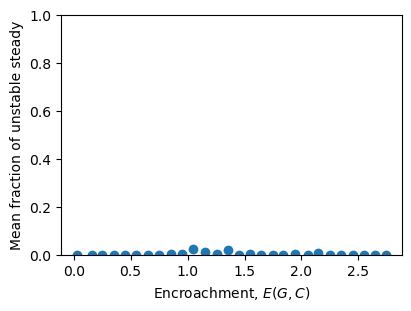

In [316]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(x_mean,usLo_mean, xerr=x_std, yerr= usLo_std, marker = 'o', ls='none')

#plt.xlim(.0,1.4)
plt.ylim(.0,1.0)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Mean fraction of unstable steady')

## Fluctuation with high diversity?

In [317]:
from scipy import stats

For const supply

In [318]:
supptype = 0 
event = ((Fractions[supptype,:,:,:,1] == 1.0) | (Fractions[supptype,:,:,:,2] == 1.0))
aevent = (~event) & (Fractions[supptype,:,:,:,0] != 1.0)

fluc = Fractions[supptype,:,:,:,0][event.nonzero(as_tuple=True)]
stdy = Fractions[supptype,:,:,:,0][aevent.nonzero(as_tuple=True)]

stats.ttest_ind(fluc,stdy,equal_var=False).pvalue

0.0

(0.0, 1.0)

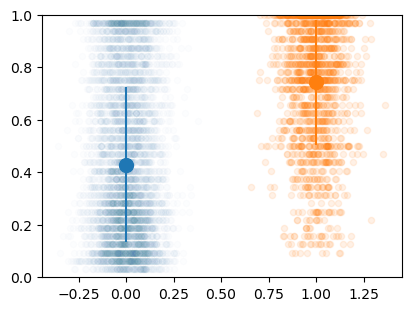

In [319]:
s1 = 0.0 + torch.randn(stdy.size())/10 # stable
f1 = 1.0 + torch.randn(fluc.size())/10 # stable

plt.figure(figsize=(4, 3),constrained_layout=True)
plt.scatter(s1,stdy, alpha=.01, s=20)
plt.scatter(f1,fluc, alpha=.1, s=20)

plt.errorbar(0.0,torch.mean(stdy), xerr=0.0, yerr= torch.std(stdy), marker = 'o', ms = 10)
plt.errorbar(1.0,torch.mean(fluc), xerr=0.0, yerr= torch.std(fluc), marker = 'o', ms = 10)

plt.ylim(0,1)

Linear suppy

In [320]:
supptype = 1
event = ((Fractions[supptype,:,:,:,1] == 1.0) | (Fractions[supptype,:,:,:,2] == 1.0))
aevent = (~event) & (Fractions[supptype,:,:,:,0] != 1.0)

flucLi = Fractions[supptype,:,:,:,0][(event).nonzero(as_tuple=True)]
stdyLi = Fractions[supptype,:,:,:,0][(aevent).nonzero(as_tuple=True)]

stats.ttest_ind(flucLi,stdyLi,equal_var=False).pvalue

2.827401242502525e-85

(0.0, 1.0)

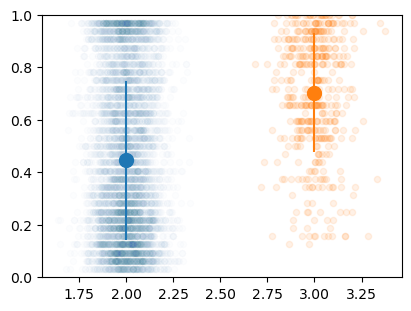

In [321]:
s2 = 2.0 + torch.randn(stdyLi.size())/10 # stable
f2 = 3.0 + torch.randn(flucLi.size())/10 # stable

plt.figure(figsize=(4, 3),constrained_layout=True)
plt.scatter(s2,stdyLi, alpha=.01, s=20)
plt.scatter(f2,flucLi, alpha=.1, s=20)

plt.errorbar(2.0,torch.mean(stdyLi), xerr=0.0, yerr= torch.std(stdyLi), marker = 'o', ms = 10)
plt.errorbar(3.0,torch.mean(flucLi), xerr=0.0, yerr= torch.std(flucLi), marker = 'o', ms = 10)

plt.ylim(0,1)

Logistic supply

In [322]:
supptype = 2
event = ((Fractions[supptype,:,:,:,1] == 1.0) | (Fractions[supptype,:,:,:,2] == 1.0))
aevent = (~event) & (Fractions[supptype,:,:,:,0] != 1.0)

flucLo = Fractions[supptype,:,:,:,0][(event).nonzero(as_tuple=True)]
stdyLo = Fractions[supptype,:,:,:,0][(aevent).nonzero(as_tuple=True)]

stats.ttest_ind(flucLo,stdyLo,equal_var=False).pvalue

0.0

In [323]:
s3 = 4.0 + torch.randn(stdyLo.size())/10 # stable
f3 = 5.0 + torch.randn(flucLo.size())/10 # stable

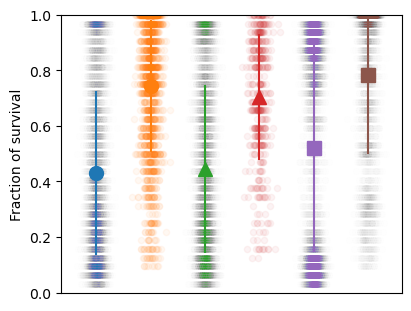

In [324]:
plt.figure(figsize=(4, 3),constrained_layout=True)

plt.scatter(s1,stdy, alpha=.005, s=20)
plt.scatter(f1,fluc, alpha=.05, s=20)

plt.scatter(s2,stdyLi, alpha=.005, s=20)
plt.scatter(f2,flucLi, alpha=.05, s=20)

plt.scatter(s3,stdyLo, alpha=.005, s=20)
plt.scatter(f3,flucLo, alpha=.005, s=20)

plt.errorbar(0.0,torch.mean(stdy), xerr=0.0, yerr= torch.std(stdy), marker = 'o', ms = 10)
plt.errorbar(1.0,torch.mean(fluc), xerr=0.0, yerr= torch.std(fluc), marker = 'o', ms = 10)

plt.errorbar(2.0,torch.mean(stdyLi), xerr=0.0, yerr= torch.std(stdyLi), marker = '^', ms = 10)
plt.errorbar(3.0,torch.mean(flucLi), xerr=0.0, yerr= torch.std(flucLi), marker = '^', ms = 10)

plt.errorbar(4.0,torch.mean(stdyLo), xerr=0.0, yerr= torch.std(stdyLo), marker = 's', ms = 10)
plt.errorbar(5.0,torch.mean(flucLo), xerr=0.0, yerr= torch.std(flucLo), marker = 's', ms = 10)

plt.ylim(0,1)
plt.xticks([])
plt.ylabel('Fraction of survival')

plt.savefig('../figures/FlucvsStabinSur.png', format='png', dpi=300)

## Draw diversity comparisons with given $E(G,C)$

In [325]:
# for const supply
supptype = 0 
Emean = 1.5

Econdi = ((EGC >= Emean - 0.05) & (EGC <= Emean + 0.05))
print("std of E is", EGC[Econdi.nonzero(as_tuple=True)].std())

event = ((Fractions[supptype,:,:,:,1] == 1.0) | (Fractions[supptype,:,:,:,2] == 1.0)) & Econdi
aevent = (~event) & (Fractions[supptype,:,:,:,0] != 1.0) & Econdi

fluc15 = Fractions[supptype,:,:,:,0][event.nonzero(as_tuple=True)]
stdy15 = Fractions[supptype,:,:,:,0][aevent.nonzero(as_tuple=True)]

std of E is tensor(0.0302)


In [326]:
stats.ttest_ind(fluc15,stdy15,equal_var=False).pvalue

2.416633307729196e-36

(0.0, 1.0)

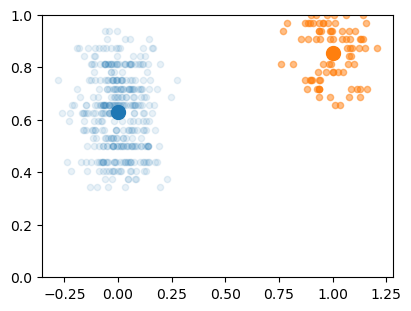

In [327]:
s1 = 0.0 + torch.randn(stdy15.size())/10 # stable
f1 = 1.0 + torch.randn(fluc15.size())/10

plt.figure(figsize=(4, 3),constrained_layout=True)
plt.scatter(s1,stdy15, alpha=.1, s=20)
plt.scatter(f1,fluc15, alpha=.5, s=20)

plt.errorbar(0.0,torch.mean(stdy15), xerr=0.0, yerr= torch.std(stdy15)/math.sqrt(len(stdy15)), marker = 'o', ms = 10)
plt.errorbar(1.0,torch.mean(fluc15), xerr=0.0, yerr= torch.std(fluc15)/math.sqrt(len(fluc15)), marker = 'o', ms = 10)

plt.ylim(0,1)

In [328]:
# for const supply
supptype = 0 
Emean = 2.0

Econdi = ((EGC >= Emean - 0.05) & (EGC <= Emean + 0.05))
print("std of E is", EGC[Econdi.nonzero(as_tuple=True)].std())

event = ((Fractions[supptype,:,:,:,1] == 1.0) | (Fractions[supptype,:,:,:,2] == 1.0)) & Econdi
aevent = (~event) & (Fractions[supptype,:,:,:,0] != 1.0) & Econdi

fluc20 = Fractions[supptype,:,:,:,0][event.nonzero(as_tuple=True)]
stdy20 = Fractions[supptype,:,:,:,0][aevent.nonzero(as_tuple=True)]

std of E is tensor(0.0273)


In [329]:
stats.ttest_ind(fluc20,stdy20,equal_var=False).pvalue

3.027756264759212e-36

(0.0, 1.0)

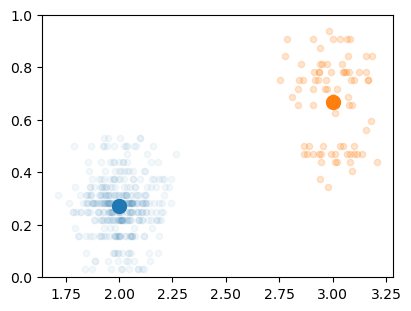

In [330]:
s2 = 2.0 + torch.randn(stdy20.size())/10 # stable
f2 = 3.0 + torch.randn(fluc20.size())/10

plt.figure(figsize=(4, 3),constrained_layout=True)
plt.scatter(s2,stdy20, alpha=.05, s=20)
plt.scatter(f2,fluc20, alpha=.2, s=20)

plt.errorbar(2.0,torch.mean(stdy20), xerr=0.0, yerr= torch.std(stdy20)/math.sqrt(len(stdy20)), marker = 'o', ms = 10)
plt.errorbar(3.0,torch.mean(fluc20), xerr=0.0, yerr= torch.std(fluc20)/math.sqrt(len(fluc20)), marker = 'o', ms = 10)

plt.ylim(0,1)

In [331]:
# for const supply
supptype = 0 
Emean = 2.5

Econdi = ((EGC >= Emean - 0.05) & (EGC <= Emean + 0.05))
print("std of E is", EGC[Econdi.nonzero(as_tuple=True)].std())

event = ((Fractions[supptype,:,:,:,1] == 1.0) | (Fractions[supptype,:,:,:,2] == 1.0)) & Econdi
aevent = (~event) & (Fractions[supptype,:,:,:,0] != 1.0) & Econdi

fluc25 = Fractions[supptype,:,:,:,0][event.nonzero(as_tuple=True)]
stdy25 = Fractions[supptype,:,:,:,0][aevent.nonzero(as_tuple=True)]

std of E is tensor(0.0262)


In [332]:
stats.ttest_ind(fluc25,stdy25,equal_var=False).pvalue

1.53695502625422e-34

In [333]:
s3 = 4.0 + torch.randn(stdy25.size())/10 # stable
f3 = 5.0 + torch.randn(fluc25.size())/10

(0.0, 1.0)

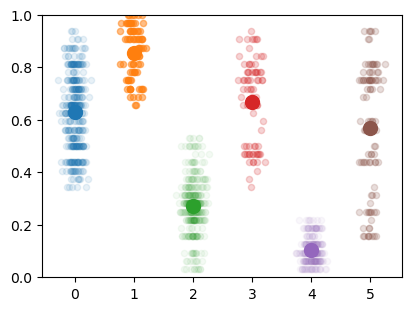

In [334]:
plt.figure(figsize=(4, 3),constrained_layout=True)

plt.scatter(s1,stdy15, alpha=.1, s=20)
plt.scatter(f1,fluc15, alpha=.5, s=20)

plt.errorbar(0.0,torch.mean(stdy15), xerr=0.0, yerr= torch.std(stdy15)/math.sqrt(len(stdy15)), marker = 'o', ms = 10)
plt.errorbar(1.0,torch.mean(fluc15), xerr=0.0, yerr= torch.std(fluc15)/math.sqrt(len(fluc15)), marker = 'o', ms = 10)

plt.scatter(s2,stdy20, alpha=.05, s=20)
plt.scatter(f2,fluc20, alpha=.2, s=20)

plt.errorbar(2.0,torch.mean(stdy20), xerr=0.0, yerr= torch.std(stdy20)/math.sqrt(len(stdy20)), marker = 'o', ms = 10)
plt.errorbar(3.0,torch.mean(fluc20), xerr=0.0, yerr= torch.std(fluc20)/math.sqrt(len(fluc20)), marker = 'o', ms = 10)


plt.scatter(s3,stdy25, alpha=.05, s=20)
plt.scatter(f3,fluc25, alpha=.2, s=20)

plt.errorbar(4.0,torch.mean(stdy25), xerr=0.0, yerr= torch.std(stdy25)/math.sqrt(len(stdy25)), marker = 'o', ms = 10)
plt.errorbar(5.0,torch.mean(fluc25), xerr=0.0, yerr= torch.std(fluc25)/math.sqrt(len(fluc25)), marker = 'o', ms = 10)


plt.ylim(0,1)

Do for all E in 1.5 and 2.5.

In [335]:
Eval = torch.zeros(2,13) # first dim: mean and std; second dim: 10 E values
Fval = torch.zeros(2,13) 
Sval = torch.zeros(2,13)
pVal = torch.zeros(13)

supptype = 0 # const supply

for i in range(13): 
    Emean = 1.3 + 0.1*i

    Econdi = ((EGC >= Emean - 0.05) & (EGC <= Emean + 0.05))
    Eval[0,i] = EGC[Econdi.nonzero(as_tuple=True)].mean()
    Eval[1,i] = EGC[Econdi.nonzero(as_tuple=True)].std()

    event = ((Fractions[supptype,:,:,:,1] == 1.0) | (Fractions[supptype,:,:,:,2] == 1.0)) & Econdi
    aevent = (~event) & (Fractions[supptype,:,:,:,0] != 1.0) & Econdi

    fluc = Fractions[supptype,:,:,:,0][event.nonzero(as_tuple=True)]
    Fval[0,i] = fluc.mean()
    Fval[1,i] = fluc.std()/math.sqrt(len(fluc))

    stdy = Fractions[supptype,:,:,:,0][aevent.nonzero(as_tuple=True)]
    Sval[0,i] = stdy.mean()
    Sval[1,i] = stdy.std()/math.sqrt(len(stdy))

    pVal[i] = stats.ttest_ind(fluc,stdy,equal_var=False).pvalue

Text(0, 0.5, 'Fraction of survival')

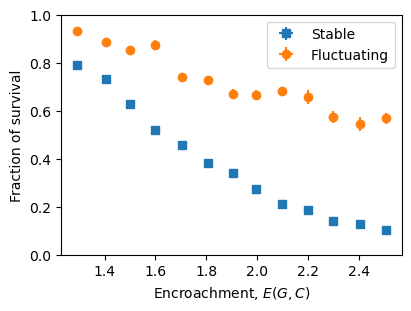

In [336]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(Eval[0],Sval[0], xerr=0, yerr= Sval[1], marker = 's',ls='none')
plt.errorbar(Eval[0],Fval[0], xerr=0, yerr= Fval[1], marker = 'o',ls='none')

plt.legend(['Stable','Fluctuating'])

#plt.xlim(1.4,2.6)
plt.ylim(0,1)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Fraction of survival')
#plt.savefig('../figures/FlucvsStabinSurmain.eps', format='eps')

In [337]:
pVal

tensor([7.8868e-26, 1.3095e-30, 2.4166e-36, 9.4682e-22, 0.0000e+00, 0.0000e+00,
        1.0964e-28, 3.0278e-36, 0.0000e+00, 1.1437e-28, 1.7915e-30, 2.6426e-26,
        1.5370e-34])